In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_cleaned.csv')
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
# Encoding the classes
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0,1)

In [8]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [42]:
X = df.drop('FWI',axis=1)
y = df['FWI']

In [43]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [44]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [45]:
# trin test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

Feature Selection based Correlation

In [47]:
corr = X_train.corr()
corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


Check for multicolinearity

<Axes: >

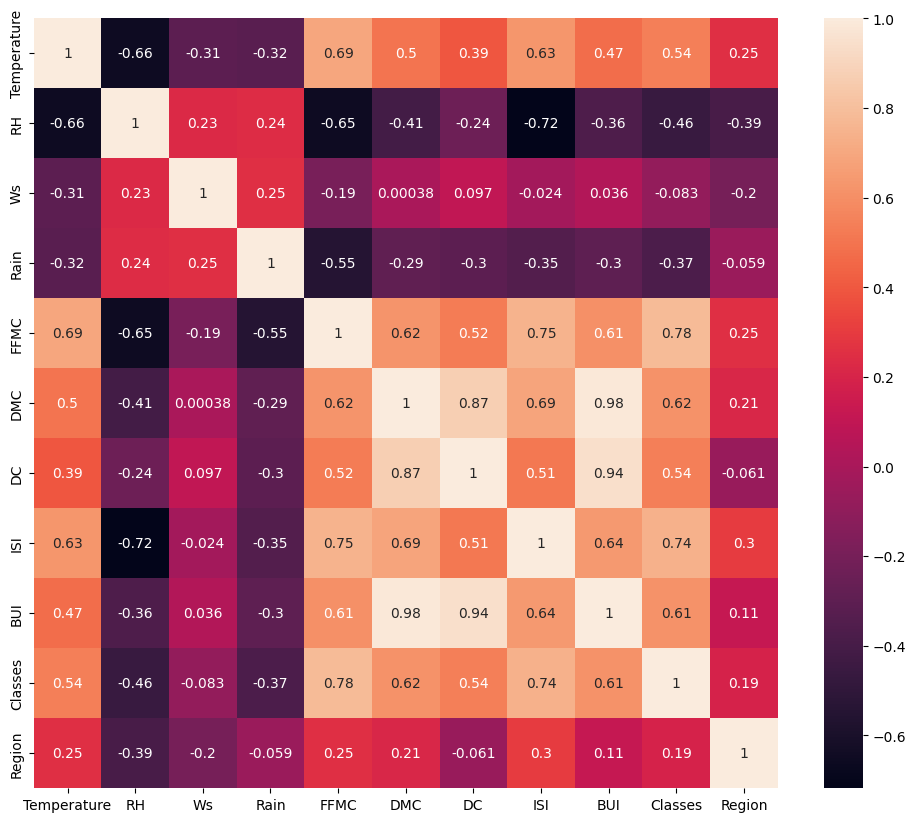

In [48]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)

In [49]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [50]:
corr_features = correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

Drop the features which have 85% correlation

In [51]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

Standarixzation

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [53]:
X_train_scale

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## Model Training

Linear Regression

In [54]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mean Absolute erorr 0.5468236465249978
R2 score  0.9847657384266951


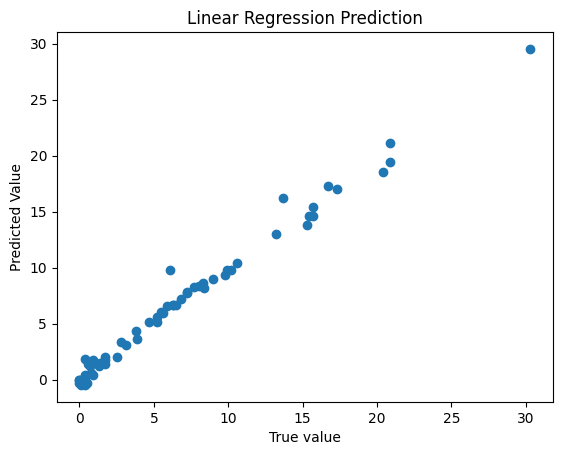

In [55]:
regression = LinearRegression()
regression.fit(X_train_scale, y_train)
reg_pred = regression.predict(X_test_scale)
mae = mean_absolute_error(y_test, reg_pred)
reg_r2 = r2_score(y_test, reg_pred)
print(f"Mean Absolute erorr", mae)  
print(f"R2 score ", reg_r2)
plt.scatter(y_test, reg_pred);
plt.xlabel('True value')
plt.ylabel('Predicted Value')
plt.title("Linear Regression Prediction");

98% Accuracy in Test data

Lasso Regressoin

Mean Absolute erorr 1.133175994914409
R2 score  0.9492020263112388


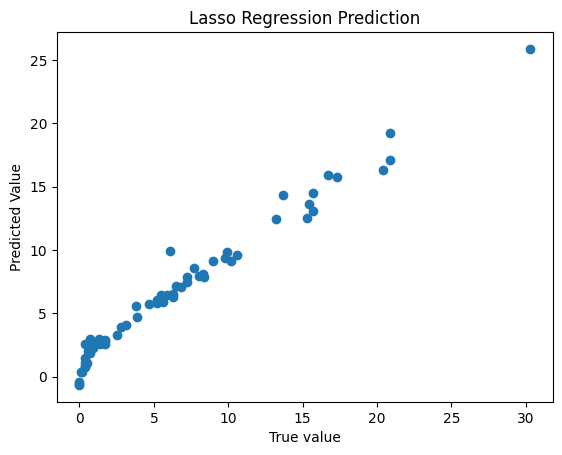

In [56]:
lasso = Lasso()
lasso.fit(X_train_scale, y_train)
lasso_pred = lasso.predict(X_test_scale)
mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
print(f"Mean Absolute erorr", mae)  
print(f"R2 score ", lasso_r2)
plt.scatter(y_test, lasso_pred);
plt.xlabel('True value')
plt.ylabel('Predicted Value')
plt.title("Lasso Regression Prediction");

## Ridge Regression Model

Mean Absolute erorr 0.5642305340105715
R2 score  0.9842993364555512


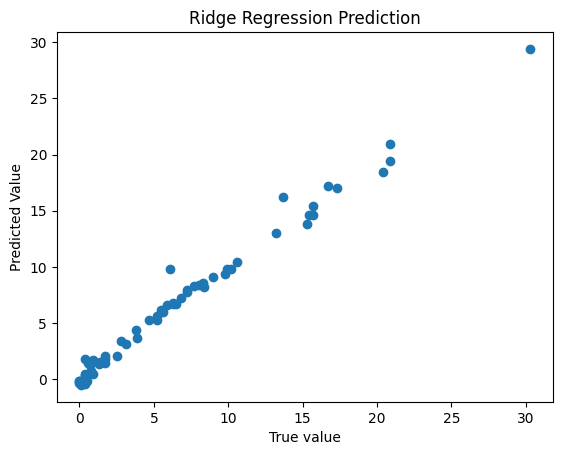

In [57]:
ridge = Ridge()
ridge.fit(X_train_scale, y_train)
prediction = ridge.predict(X_test_scale)
mae = mean_absolute_error(y_test, prediction)
ridge_r2 = r2_score(y_test, prediction)
print(f"Mean Absolute erorr", mae)  
print(f"R2 score ", ridge_r2)
plt.scatter(y_test, prediction);
plt.xlabel('True value')
plt.ylabel('Predicted Value')
plt.title("Ridge Regression Prediction");

Elastic Net Regression

Mean Absolute erorr 1.8822353634896005
R2 score  0.8753460589519703


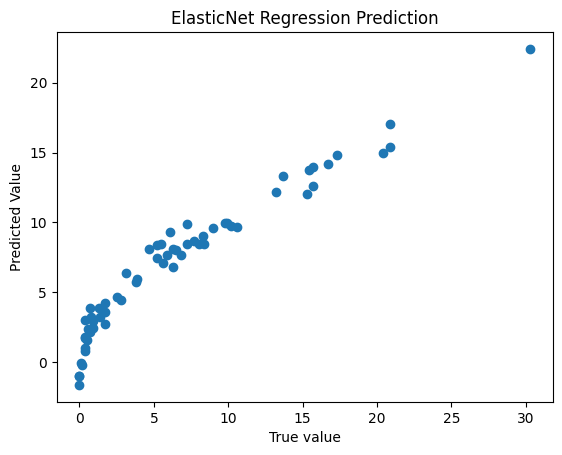

In [58]:
elastic = ElasticNet()
elastic.fit(X_train_scale, y_train)
prediction = elastic.predict(X_test_scale)
mae = mean_absolute_error(y_test, prediction)
elastic_r2 = r2_score(y_test, prediction)
print(f"Mean Absolute erorr", mae)  
print(f"R2 score ", elastic_r2)
plt.scatter(y_test, prediction);
plt.xlabel('True value')
plt.ylabel('Predicted Value')
plt.title("ElasticNet Regression Prediction");

## Hyper Parameter Tuning

LassoCV

In [59]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scale, y_train)
lassocv.predict(X_test_scale)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [60]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [61]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [62]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

Mean Absolute erorr 0.619970115826343
R2 score  0.9820946715928275


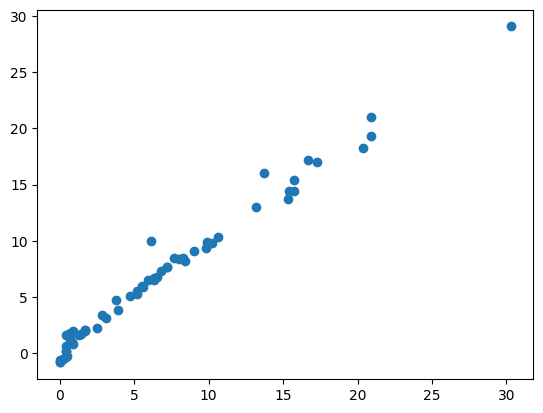

In [63]:
mae = mean_absolute_error(y_test, lassocv.predict(X_test_scale))
lassocv_r2 = r2_score(y_test, lassocv.predict(X_test_scale))
print(f"Mean Absolute erorr", mae)  
print(f"R2 score ", lassocv_r2)
plt.scatter(y_test, lassocv.predict(X_test_scale));

RidgeCV

Mean Absolute erorr 0.5642305340105715
R2 score  0.9842993364555512


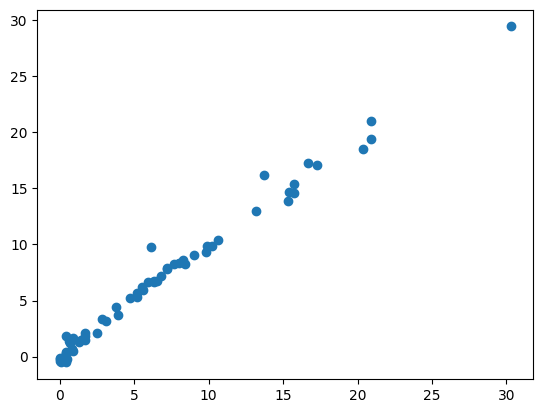

In [64]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scale, y_train)
prediction = ridgecv.predict(X_test_scale)
mae = mean_absolute_error(y_test, prediction)
ridgecv_r2 = r2_score(y_test, prediction)
print(f"Mean Absolute erorr", mae)  
print(f"R2 score ", ridgecv_r2)
plt.scatter(y_test, prediction);

In [65]:
ridgecv.alpha_

np.float64(1.0)

In [66]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

ElasticNet CV

Mean Absolute erorr 0.6575946731430898
R2 score  0.9814217587854941


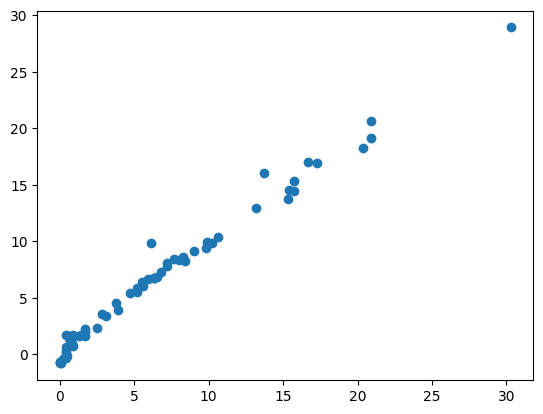

In [67]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scale, y_train)
prediction = elasticcv.predict(X_test_scale)
mae = mean_absolute_error(y_test, prediction)
elasticcv_r2 = r2_score(y_test, prediction)
print(f"Mean Absolute erorr", mae)  
print(f"R2 score ", elasticcv_r2)
plt.scatter(y_test, prediction);

In [68]:
elasticcv.alpha_

np.float64(0.04311146156383891)

In [69]:
elasticcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

Model Summary

In [70]:
print(f'Before Hyper parameter Tuning ')
print(f'Accuracy of the Model : Linear Regression {reg_r2}')
print(f'Accuracy of the Model : Lasso Regression {lasso_r2}')
print(f'Accuracy of the Model : Ridge Regression {ridge_r2}')
print(f'Accuracy of the Model : Elastic Net Regression {elastic_r2} \n')
print('After Hyper Parameter Tuning')
print(f'Accuracy of the Model : LassoCv {lassocv_r2}')
print(f'Accuracy of the Model : RidgeCv {ridgecv_r2}')
print(f'Accuracy of the Model : ElasticCv {elasticcv_r2}')

Before Hyper parameter Tuning 
Accuracy of the Model : Linear Regression 0.9847657384266951
Accuracy of the Model : Lasso Regression 0.9492020263112388
Accuracy of the Model : Ridge Regression 0.9842993364555512
Accuracy of the Model : Elastic Net Regression 0.8753460589519703 

After Hyper Parameter Tuning
Accuracy of the Model : LassoCv 0.9820946715928275
Accuracy of the Model : RidgeCv 0.9842993364555512
Accuracy of the Model : ElasticCv 0.9814217587854941


## Model Pickling, exporting

    Picklise the standardization model and Ridge Model

In [71]:
scaler

StandardScaler()

In [72]:
ridge

Ridge()

In [73]:
import pickle
pickle.dump(scaler, open('scaler_model.pkl', 'wb'))
pickle.dump(ridge, open('ridge_model.pkl', 'wb'))